<a href="https://colab.research.google.com/github/Gh0st116/clothes-classification/blob/main/clothes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import keras.optimizers as opt
import keras.callbacks as callbacks
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [2]:
# Mounting google drive
#from google.colab import drive
# from google.colab import drive

# drive.mount(‘/content/drive’)

In [3]:
# Loading dataset from Keras MNIST and separating into train and test data
dataset = keras.datasets.fashion_mnist
((train_imgs, train_ids), (test_imgs, test_ids)) = dataset.load_data()

In [4]:
print(train_imgs)
print(len(train_imgs), "train images")
print(f"train shape: {train_imgs.shape}")
print(f"test shape: {test_imgs.shape}")

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
60000 train images
train shape: (60000, 28, 28)
test shape: (10000, 28, 28)


# Train Images

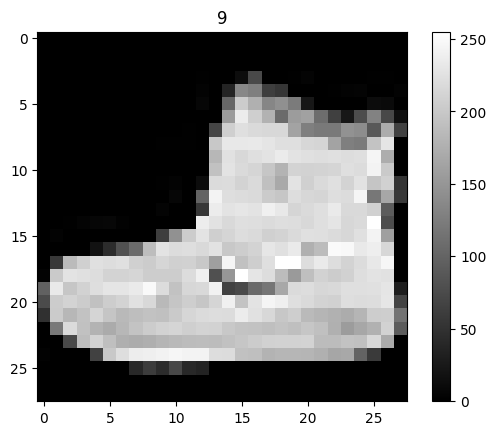

In [5]:
# Print first image in dataset in grayscale
plt.imshow(train_imgs[0], cmap='gray')
plt.title(train_ids[0])
plt.colorbar()

In [6]:
total_classifications = train_ids.max() + 1
name_classifications = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

total_classifications

10

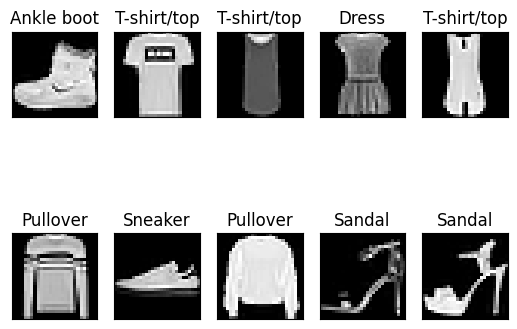

In [7]:
for img in range(10):
  plt.subplot(2, 5, img + 1)
  plt.imshow(train_imgs[img], cmap='gray')
  plt.title(name_classifications[train_ids[img]])
  plt.xticks([])
  plt.yticks([])

# Creating Model

In [8]:
# Normalizing images
train_imgs = train_imgs / 255.0

In [9]:
model = keras.Sequential([
    # Input
    keras.layers.Flatten(input_shape=(28, 28)),
    # Processing
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    # Output
    keras.layers.Dense(total_classifications, activation=tf.nn.softmax)
])

adam = opt.Adam(learning_rate=0.0015)

callbacks = [callbacks.EarlyStopping(monitor='val_loss'),
             callbacks.ModelCheckpoint(
                filepath="model_checkpoint.hdf5",
                monitor='val_loss',
                save_best_only=True
             )
]

# Compiling
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model summary

In [10]:
summary = model.summary()
print(summary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## Fitting

In [11]:
def fit_model():
  return model.fit(
      train_imgs,
      train_ids,
      batch_size=480,
      epochs=5,
      validation_split=0.2,
      callbacks=callbacks
  )

In [12]:
history = fit_model()

Epoch 1/5
100/100 [==============================] - 6s 45ms/step - loss: 0.6814 - accuracy: 0.7648 - val_loss: 0.4783 - val_accuracy: 0.8333
Epoch 2/5
100/100 [==============================] - 4s 42ms/step - loss: 0.4580 - accuracy: 0.8412 - val_loss: 0.4156 - val_accuracy: 0.8543
Epoch 3/5
100/100 [==============================] - 5s 51ms/step - loss: 0.4029 - accuracy: 0.8582 - val_loss: 0.3881 - val_accuracy: 0.8617
Epoch 4/5
100/100 [==============================] - 4s 38ms/step - loss: 0.3778 - accuracy: 0.8654 - val_loss: 0.3928 - val_accuracy: 0.8610


# Saving model

In [13]:
model.save("model_clothes.h5")
saved_model = load_model("model_clothes.h5")

# Plotting metrics

In [14]:
def plot_accuracy(hist, title = "Epoch accuracy"):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title(title)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["train", "validation"])

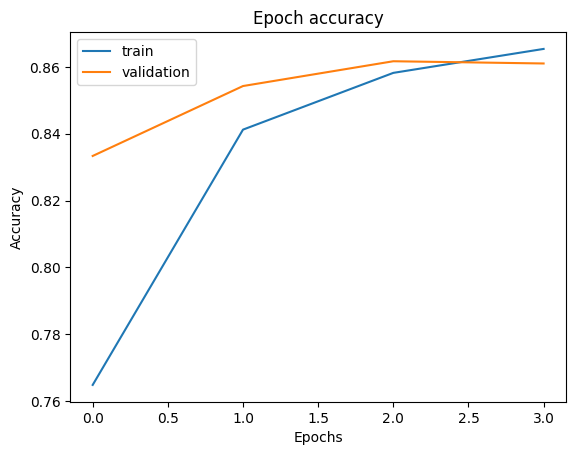

In [15]:
plot_accuracy(history)

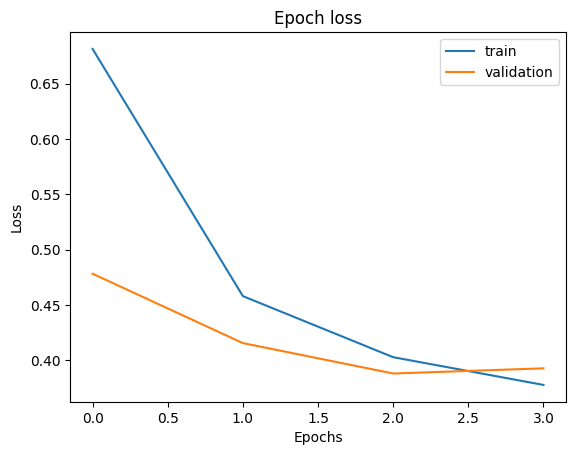

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Epoch loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"])

# Experimenting with weights and biases

Getting weights and biases from the first dense layer

In [17]:
weights_dense = model.layers[1].get_weights()[0]
weights_dense

array([[-0.08428574,  0.0130396 , -0.02989433, ...,  0.04700617,
         0.04663603, -0.01360078],
       [-0.07920317, -0.02359724,  0.07276349, ..., -0.04813279,
         0.09163053,  0.05681588],
       [-0.05502504, -0.08280339, -0.07304257, ...,  0.13709469,
        -0.02304514,  0.05656626],
       ...,
       [-0.01587735, -0.06784764, -0.03373574, ..., -0.11925259,
         0.04050336,  0.0963807 ],
       [ 0.10059375, -0.120464  , -0.0329159 , ...,  0.01243792,
         0.00267507,  0.11716186],
       [ 0.045119  , -0.06261069, -0.0623207 , ...,  0.02887167,
         0.0146824 ,  0.0582701 ]], dtype=float32)

In [18]:
biases_dense = model.layers[1].get_weights()[1]
biases_dense

array([ 0.0856343 ,  0.03219372, -0.01258693, -0.00710519,  0.0652193 ,
       -0.00949059,  0.07507475, -0.01142997, -0.0047085 ,  0.04628141,
        0.05773142,  0.06735483, -0.03697575, -0.08703718, -0.10456732,
        0.07620978,  0.03925778, -0.00728198, -0.108894  ,  0.07090112,
       -0.07009461,  0.11206108,  0.17606238,  0.15633503, -0.00385898,
       -0.01875527, -0.01025808,  0.01927035, -0.04619016,  0.02002531,
        0.18261497,  0.11014005, -0.10923595, -0.02178553,  0.07935804,
        0.09621618, -0.06366257, -0.01158452,  0.02255847, -0.02184115,
       -0.01645877,  0.05040057, -0.04417776, -0.01890969,  0.14083363,
        0.01501469,  0.07711527, -0.04736679,  0.08515631, -0.01265587,
       -0.00980035,  0.02867547, -0.02365308,  0.09491535, -0.09939253,
        0.14123037, -0.01494581,  0.04275345,  0.12952802,  0.01803062,
        0.06831305,  0.07589871, -0.01174751,  0.03178228, -0.10472587,
       -0.06264166,  0.08756217, -0.11884321,  0.11835904, -0.01

Altering weights from dense layer

In [19]:
weights_dense.shape

(784, 256)

Epoch 1/5
100/100 [==============================] - 4s 44ms/step - loss: 0.7412 - accuracy: 0.7384 - val_loss: 0.4840 - val_accuracy: 0.8327
Epoch 2/5
100/100 [==============================] - 3s 34ms/step - loss: 0.4761 - accuracy: 0.8346 - val_loss: 0.4445 - val_accuracy: 0.8432
Epoch 3/5
100/100 [==============================] - 2s 16ms/step - loss: 0.4334 - accuracy: 0.8472 - val_loss: 0.4029 - val_accuracy: 0.8558
Epoch 4/5
100/100 [==============================] - 2s 18ms/step - loss: 0.4039 - accuracy: 0.8574 - val_loss: 0.3832 - val_accuracy: 0.8637
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 0.3874 - accuracy: 0.8639 - val_loss: 0.3746 - val_accuracy: 0.8674


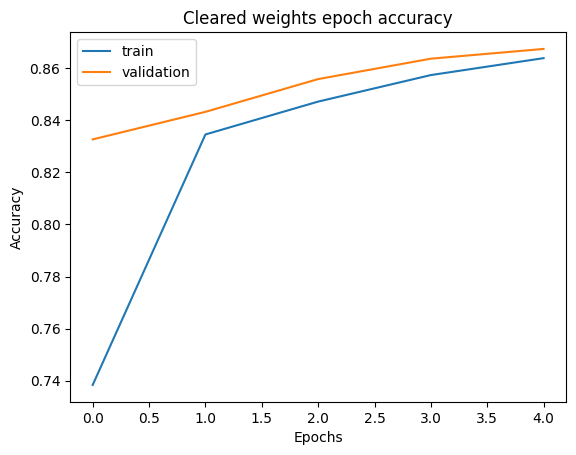

In [20]:
cleared_weights_dense = np.zeros((784, 256))
random_weights_dense = np.random.rand(784, 256)

model.layers[1].set_weights(
    [cleared_weights_dense, biases_dense]
)

# Model fitness with all weights in Dense cleared
plot_accuracy(fit_model(), "Cleared weights epoch accuracy")

Epoch 1/5
100/100 [==============================] - 2s 18ms/step - loss: 126.0086 - accuracy: 0.3132 - val_loss: 11.2265 - val_accuracy: 0.6838
Epoch 2/5
100/100 [==============================] - 3s 27ms/step - loss: 43.9472 - accuracy: 0.5051 - val_loss: 10.7033 - val_accuracy: 0.7293
Epoch 3/5
100/100 [==============================] - 2s 19ms/step - loss: 29.2276 - accuracy: 0.5720 - val_loss: 8.9462 - val_accuracy: 0.7445
Epoch 4/5
100/100 [==============================] - 2s 18ms/step - loss: 20.8393 - accuracy: 0.6100 - val_loss: 8.0483 - val_accuracy: 0.7497
Epoch 5/5
100/100 [==============================] - 2s 18ms/step - loss: 15.6533 - accuracy: 0.6340 - val_loss: 6.9700 - val_accuracy: 0.7179


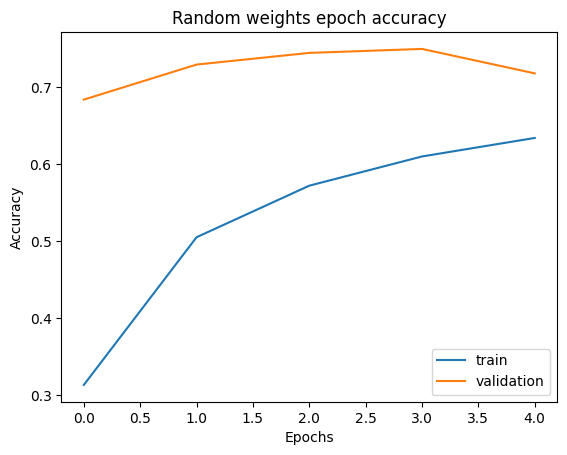

In [21]:
model.layers[1].set_weights(
    [random_weights_dense, biases_dense]
)

# Model fitness with random weights in dense layer
plot_accuracy(fit_model(), "Random weights epoch accuracy")

In [22]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

Altering biases from dense layer

In [23]:
biases_dense.shape

(256,)

Epoch 1/5
100/100 [==============================] - 2s 20ms/step - loss: 55.3772 - accuracy: 0.2751 - val_loss: 9.6946 - val_accuracy: 0.5257
Epoch 2/5
100/100 [==============================] - 2s 17ms/step - loss: 23.3719 - accuracy: 0.4305 - val_loss: 7.0084 - val_accuracy: 0.6387
Epoch 3/5
100/100 [==============================] - 3s 25ms/step - loss: 15.9926 - accuracy: 0.4845 - val_loss: 8.4659 - val_accuracy: 0.6126


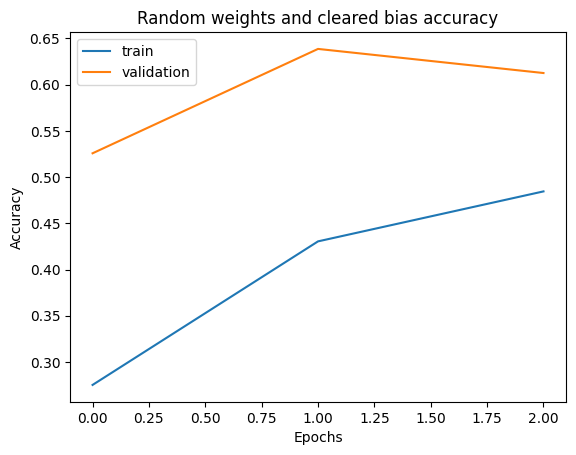

In [24]:
cleared_biases_dense = np.zeros((256,))

model.layers[1].set_weights(
    [random_weights_dense, cleared_biases_dense]
)

plot_accuracy(fit_model(), "Random weights and cleared bias accuracy")

# Model predictions

In [25]:
tests = model.predict(test_imgs)
print(f"Image predict: {name_classifications[np.argmax(tests[0])]}")

tests_saved_model = saved_model.predict(test_imgs)
print(f"Image predict of saved model: {name_classifications[np.argmax(tests_saved_model[0])]}")

print(f"Actual value: {name_classifications[train_ids[0]]}")

313/313 [==============================] - 1s 2ms/step
Image predict: Ankle boot
313/313 [==============================] - 1s 2ms/step
Image predict of saved model: Ankle boot
Actual value: Ankle boot


# Evaluating model

In [26]:
loss_test, accuracy_test = model.evaluate(test_imgs, test_ids)

print(f"Loss: {loss_test}")
print(f"Accuracy: {accuracy_test}")

313/313 [==============================] - 1s 3ms/step - loss: 2354.6758 - accuracy: 0.5961
Loss: 2354.67578125
Accuracy: 0.5960999727249146
